# Federico Andrucci - 000105....

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette

# Variables
file_name = 'lab_exercise.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (2pt)
3. a clustering schema using a method of your choice exploring a range of parameter
values (5pt)
4. the plot of the global inertia (SSD) and silhouette index for the parameter values you
examine (4pt)
5. the optimal parameters of your choice (4pt)
6. a pairplot of the data using as hue the cluster assignment with the optimal parameter
(3pt)
7. a plot of the silhouette index for the data points, grouped according to the clusters
(4pt)
8. A sorted list of the discovered clusters for decreasing sizes (7pt)

## 1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)

In [6]:
# Load the data
df = pd.read_csv(file_name, sep=separator, header=None)

Produce the boxplots

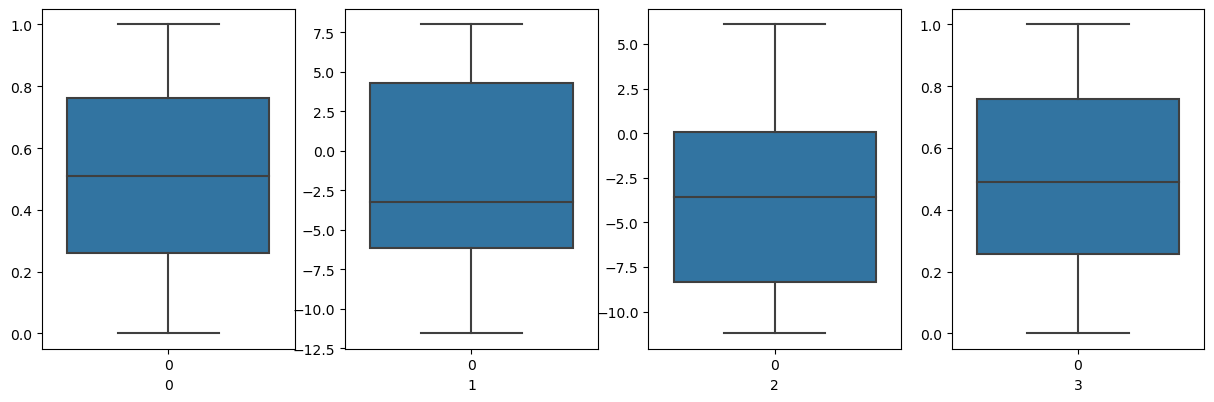

In [15]:
plt.figure(figsize=(15, 15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos)
    plt.xlabel(i)
    sns.boxplot(df[i])
    pos += 1

The boxplots show that there are no outliers. The distribution 0 and 3 are very similar, and the distributions 1 and 2 have the same median but different data distribution.

## 2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)

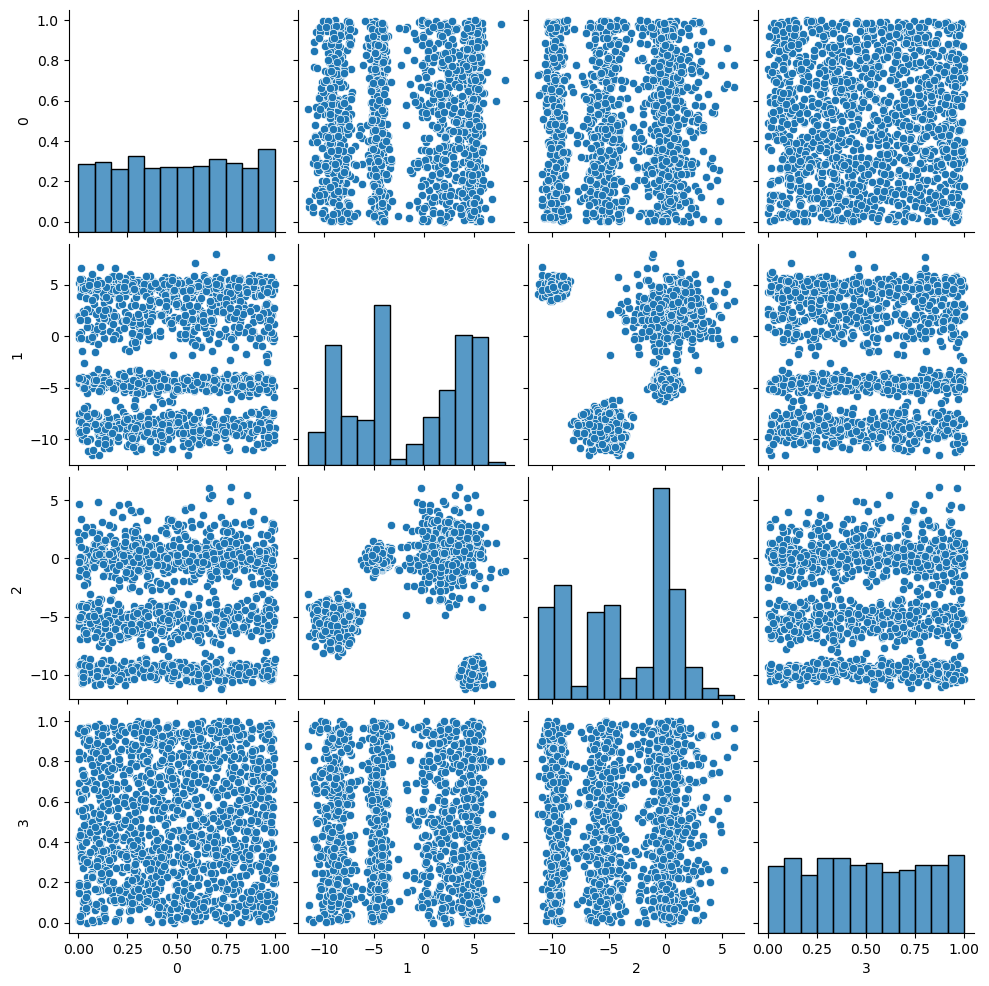

In [16]:
sns.pairplot(df)

The pairplot shows clearly that the columns 1 and 2 have 3 well distinct clusters.

## 3. a clustering schema using a method of your choice exploring a range of parameter values (5pt)

In order to find the best clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters.

In [17]:
k_range = range(2, 11)

# inertia and silhouette as measures
silhouette_scores = []
inertias = []

for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
    y_km = km.fit_predict(df)

    # appending the measures
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df, y_km))

## 4. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine (4pt)

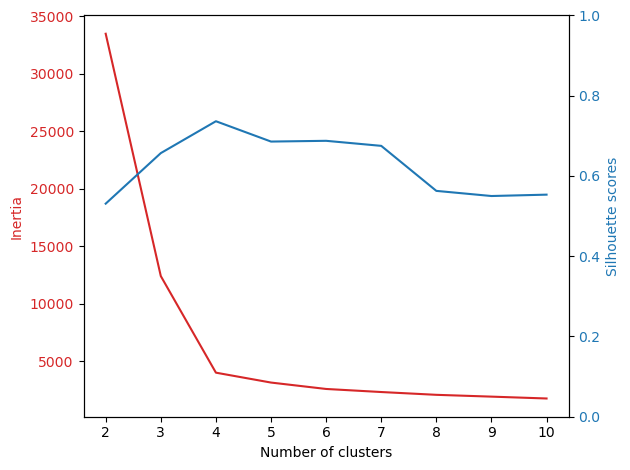

In [18]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, inertias, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 5. the optimal parameters of your choice (4pt)

Both the silhouette score and the inertia suggest that the best number of clusters is 4, as we expected.

In [19]:
best_k = 4

## 6. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)

In [20]:
# instantiate kmeans with the optimal parameters
km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
y_km = km.fit_predict(df)

In order to use the predicted classes as hue we will add to a new dataframe usign `.assign()` function

In [21]:
X_pred = df.assign(y_pred=y_km)

Show the pairplot

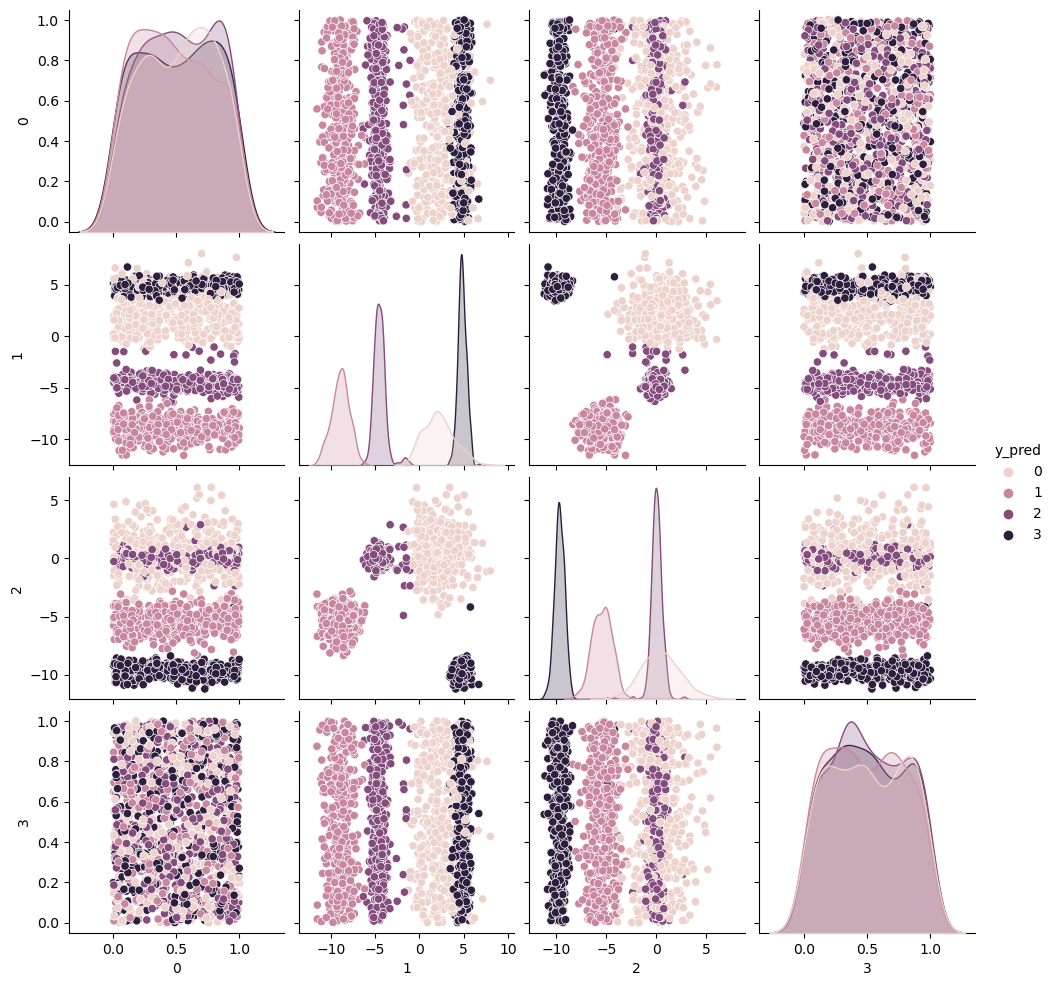

In [22]:
sns.pairplot(X_pred, hue='y_pred')

## 7. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)

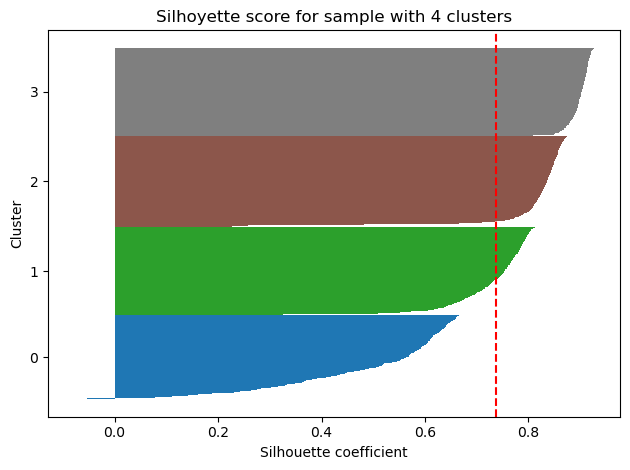

In [23]:
silhouette_score_samples = silhouette_samples(df, y_km, metric='euclidean')

plt.title(f'Silhoyette score for sample with {best_k} clusters')
plot_silhouette(silhouette_score_samples, y_km)

## 7. A sorted list of the discovered clusters for decreasing sizes (7pt)